In [9]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import sklearn 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#citric acid values were zero which technically can't be
red=red.mask(red==0).fillna(red.mean())
#mask converts 0 to NAN values and fillna its replaced by mean values

In [11]:
pd.isnull(red) 
print(red.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [12]:
from sklearn.model_selection import train_test_split
y1=red["quality"]
y = np.asarray(y1)

y=y.reshape(-1,1)
red.drop(["quality"], axis = 1, inplace = True)
x = np.asarray(red,dtype=np.float64)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.52835961  0.96187667 -0.12631512 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -0.12631512 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.43057996 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.92237117 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.97883881 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  0.99752871 ...  0.51112954  0.01092425
   0.54162988]]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
#using KNN classifier

/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


('Accuracy:', 3, '  ', 0.596875)
('Accuracy:', 4, '  ', 0.5875)
('Accuracy:', 5, '  ', 0.5875)
('Accuracy:', 6, '  ', 0.5875)
('Accuracy:', 7, '  ', 0.578125)
('Accuracy:', 8, '  ', 0.584375)
('Accuracy:', 9, '  ', 0.571875)
('Accuracy:', 10, '  ', 0.55625)
('Accuracy:', 11, '  ', 0.5625)
('Accuracy:', 12, '  ', 0.553125)
('Accuracy:', 13, '  ', 0.559375)
('Accuracy:', 14, '  ', 0.55625)
('Accuracy:', 15, '  ', 0.55)
('Accuracy:', 16, '  ', 0.571875)
('Accuracy:', 17, '  ', 0.571875)
('Accuracy:', 18, '  ', 0.5625)
('Accuracy:', 19, '  ', 0.559375)
('Accuracy:', 20, '  ', 0.575)
('Accuracy:', 21, '  ', 0.58125)
('Accuracy:', 22, '  ', 0.584375)
('Accuracy:', 23, '  ', 0.584375)
('Accuracy:', 24, '  ', 0.578125)
('Accuracy:', 25, '  ', 0.584375)
('Accuracy:', 26, '  ', 0.571875)
('Accuracy:', 27, '  ', 0.58125)
('Accuracy:', 28, '  ', 0.571875)
('Accuracy:', 29, '  ', 0.5875)
('Accuracy:', 30, '  ', 0.58125)
('Accuracy:', 31, '  ', 0.571875)
('Accuracy:', 32, '  ', 0.58125)
('Accuracy:'

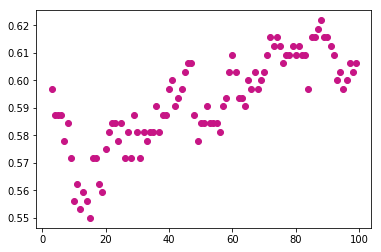

88


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
accuracy=0
n=3
for i in range (3,100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred1 = classifier.predict(x_test)
    print("Accuracy:",i,"  ",metrics.accuracy_score(y_test,y_pred1))
    if metrics.accuracy_score(y_test,y_pred1)>accuracy:
        accuracy=metrics.accuracy_score(y_test,y_pred1)
        n=i
    plt.plot(i,metrics.accuracy_score(y_test,y_pred1),marker='o', color='mediumvioletred')
plt.show()
print(n)

In [16]:
classifier = KNeighborsClassifier(n_neighbors=n)
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test,y_pred1))

('Accuracy:', 62.18749999999999)


/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))

[[ 0  0  2  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 99 36  0  0]
 [ 0  0 43 94  5  0]
 [ 0  0  1 20  6  0]
 [ 0  0  0  1  2  0]]


In [18]:
#using decision trees

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

('Accuracy:', 65.0)
[[ 0  0  1  1  0  0]
 [ 0  3  4  4  0  0]
 [ 2  2 98 30  3  0]
 [ 1  4 30 92 14  1]
 [ 0  0  1  6 15  5]
 [ 0  0  0  1  2  0]]


In [20]:
#using random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred3=rf.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

('Accuracy:', 66.875)
[[  0   0   0   2   0   0]
 [  0   0   6   4   1   0]
 [  0   1 108  24   2   0]
 [  0   0  36  93  13   0]
 [  0   0   1  11  13   2]
 [  0   0   0   1   2   0]]


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#using SVM classifier

In [23]:
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train, y_train)
y_pred4 = clf.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

('Accuracy:', 62.81250000000001)
[[  0   0   1   1   0   0]
 [  0   0   8   3   0   0]
 [  0   0 100  35   0   0]
 [  0   0  42  93   7   0]
 [  0   0   1  18   8   0]
 [  0   0   0   1   2   0]]


In [24]:
#using Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred5=nb.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

('Accuracy:', 54.6875)
[[ 0  0  1  1  0  0]
 [ 0  0  7  3  0  1]
 [ 1  5 86 36  7  0]
 [ 0  2 31 76 27  6]
 [ 1  0  0  9 13  4]
 [ 0  0  0  0  3  0]]
